Importo librerias a usar

In [1]:
# Importo librerías
import numpy as np
import matplotlib.pyplot as plt
import time

Uso la funcion mi_funcion_sen para simular un fuente con ruido interno

In [2]:
# funcion Seno
def mi_funcion_sen( vmax, dc, ff, ph, nn, fs, snr):
    Ts = 1/fs
    tt = np.arange(0, nn*Ts, Ts)
    ww = 2 * np.pi * ff
    vnorm = np.sqrt(2) 
    
    clean_signal = vnorm * np.sin(ww * tt + ph) + dc
    pow_noise = pow(base=10, exp= -snr/10)
    vnoise = np.sqrt(pow_noise*12)
    noise = np.random.uniform(-vnoise/2, vnoise/2, size = nn)
    
    xx = (clean_signal+noise)*vmax/np.sqrt(2)
    return tt, xx

Defino mi funcion que calcula la transformada discreta de Fourier

In [3]:
def mi_funcion_DFT_v1( xx ):
    
    NN = len(xx)
    
    XX = np.zeros(NN, dtype=np.complex64)
    
    for i in range(NN):
        for j in range (NN):
            XX[i] += xx[j] * np.exp(-2j * np.pi * i * j / NN) #/ NN
    return XX

In [4]:
def mi_funcion_DFT_v2( xx ):
    
    NN = len(xx)
    
    XX = np.zeros(NN, dtype=np.complex64)
    indexes = np.arange(NN)
    
    for i in range(NN):
        XX[i] += sum(xx * np.exp(-2j * np.pi * i * indexes / NN)) #/ NN
    return XX

Genero una funcion senoidal en funcion de sus parametros principales y ploteo un ciclo

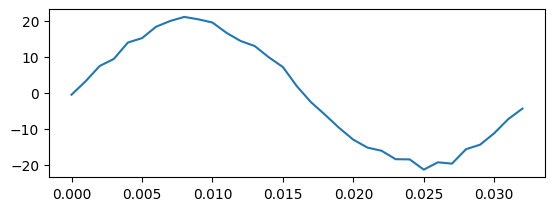

In [5]:
vmax = 20
dc = 0
frec = 30
ph = 0
nn = 1000
fs = nn
snr = 25
tt, xx = mi_funcion_sen( vmax, dc, frec, ph, nn, fs, snr)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(tt[:round(nn/frec)], xx[:round(nn/frec)])

Calculo la transformada de Fourier discreta con mi funcion y la transformada rapida de fourier de la libreria numpy para compararlas graficamente.

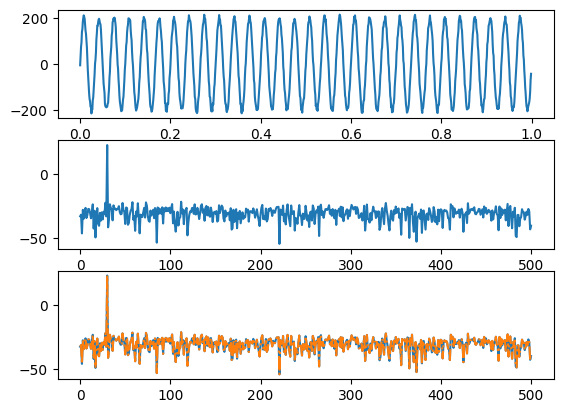

In [6]:
N = nn
df = fs/nn
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2

my_ft_XX = 1/N*mi_funcion_DFT_v1(xx)
my_ft_XX_2 = 1/N*mi_funcion_DFT_v2(xx)
fft_ft_XX = 1/N*np.fft.fft( xx, axis = 0 )

plt.figure(1)
plt.subplot(3,1,1)
plt.plot( tt, 10 * xx)
plt.figure(1)
plt.subplot(3,1,2)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(fft_ft_XX[bfrec])**2))
plt.subplot(3,1,3)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(my_ft_XX[bfrec])**2))
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(my_ft_XX_2[bfrec])**2),'-.')

Comparo los tiempos de ejecucion de las funciones

In [ ]:
vmax = 20
dc = 0
frec = 30
ph = 0
snr = 25

nn = 100
fs = nn
tt, xx = mi_funcion_sen( vmax, dc, frec, ph, nn, fs, snr)

N = nn
df = fs/nn
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2

print("Cantidad de muestras: "+str(nn))
print("Tiempos de ejecucion:")
start = time.time()
fft_ft_XX = 1/N*np.fft.fft( xx, axis = 0 )
end = time.time()
print("  np.fft.fft:        "+str(round(end - start,4))+"s")

start = time.time()
my_ft_XX = mi_funcion_DFT_v1(xx)
end = time.time()
print("  mi_funcion_DFT_v1: "+str(round(end - start,4))+"s")

start = time.time()
my_ft_XX_2 = mi_funcion_DFT_v2(xx)
end = time.time()
print("  mi_funcion_DFT_v2: "+str(round(end - start,4))+"s")
print("")

#######################

vmax = 20
dc = 0
frec = 30
ph = 0
snr = 25

nn = 1000
fs = nn
tt, xx = mi_funcion_sen( vmax, dc, frec, ph, nn, fs, snr)

N = nn
df = fs/nn
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2

print("Cantidad de muestras: "+str(nn))
print("Tiempos de ejecucion:")
start = time.time()
fft_ft_XX = 1/N*np.fft.fft( xx, axis = 0 )
end = time.time()
print("  np.fft.fft:        "+str(round(end - start,4))+"s")

start = time.time()
my_ft_XX = mi_funcion_DFT_v1(xx)
end = time.time()
print("  mi_funcion_DFT_v1: "+str(round(end - start,4))+"s")

start = time.time()
my_ft_XX_2 = mi_funcion_DFT_v2(xx)
end = time.time()
print("  mi_funcion_DFT_v2: "+str(round(end - start,4))+"s")
print("")

########################

vmax = 20
dc = 0
frec = 30
ph = 0
snr = 25

nn = 5000
fs = nn
tt, xx = mi_funcion_sen( vmax, dc, frec, ph, nn, fs, snr)

N = nn
df = fs/nn
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2

print("Cantidad de muestras: "+str(nn))
print("Tiempos de ejecucion:")
start = time.time()
fft_ft_XX = 1/N*np.fft.fft( xx, axis = 0 )
end = time.time()
print("  np.fft.fft:        "+str(round(end - start,4))+"s")

start = time.time()
my_ft_XX = mi_funcion_DFT_v1(xx)
end = time.time()
print("  mi_funcion_DFT_v1: "+str(round(end - start,4))+"s")

start = time.time()
my_ft_XX_2 = mi_funcion_DFT_v2(xx)
end = time.time()
print("  mi_funcion_DFT_v2: "+str(round(end - start,4))+"s")
print("")

Cantidad de muestras: 100
Tiempos de ejecucion:
  np.fft.fft:        0.0s
  mi_funcion_DFT_v1: 0.0319s
  mi_funcion_DFT_v2: 0.003s

Cantidad de muestras: 1000
Tiempos de ejecucion:
  np.fft.fft:        0.0s
  mi_funcion_DFT_v1: 3.1446s
  mi_funcion_DFT_v2: 0.3181s

Cantidad de muestras: 5000
Tiempos de ejecucion:
  np.fft.fft:        0.0s
  mi_funcion_DFT_v1: 95.1479s
